## Final Project Submission

Please fill out:
* Student name: **Leonard Rotich**
* Student pace: **Full Time**
* Scheduled project review date/time: 
* Instructor name: ** William Okomba**
* Blog post URL:


# Microsoft Movie Studio Proposal.

## Objectives
The main aim of this analysis is to advise Microsoft on which movies to produce and the cost involved.  Basing on the current moving studios, descriptive analysis on the movie stores and orders as to have a clear picture of which movies are profitable. This will then be used by Microsoft to put an up to date movies store.

## Business problem
Microsoft needs to open an up to date movie studio with all movies incorporated in the store so as to be stay afloat in the market. This project sought to answer the following.
>> Is the film industry profitable?

>> How has the film industry perform in the previous years?

>> Does film producer affect the performance of a film?

>> Is there any preference in relation to geographical location?




# Data
The data used on this analysis is obtained from the movie studios that are currently in the market like `bom.movie_gross.csv.gz.
Since we need the best films to recommend we will then use the top most performing films to do some analysis and make a conclusion on them.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd # for df
import numpy as np # for calculation
#import seborn and matplotlip for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 



Loading csv data bom.movie_gross.csv using `pd.read_csv`


In [2]:
# Loading csv data
df = pd.read_csv('data/bom.movie_gross.csv.gz')
# previewing the first 5 rows
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [560]:
# Preview the last 5 rows
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


## Understanding the Data

Exploring a dataset for better understanding of what it contains hence making an informed business decisions.


In [561]:
# check the column names
list(df.columns)

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [562]:
# Shape of the data
def data_shape(data):
    print(f"The dataframe has:\n - {data.shape[0]} Rows\n - {data.shape[1]} colums ")

data_shape(df)

The dataframe has:
 - 3387 Rows
 - 5 colums 


In [563]:
# Data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [564]:
# describe for descriptive statistics
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### 1. Duplicates
Checking of ther are dublicates in the data and the removing them 

In [565]:
# duplicate entries
# create a funcion to identify and add dublicate from dataframe
def checking_duplicates(data):
    duplicates = [] # empty list to store the bool results
    for d in data.duplicated():
        duplicates.append(d)
    # indetify if there is ant duplicate which we expect to be True value
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print('The data has no duplicate.')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true +=1
        # calculate the percentage of the dublicates 
        dup_percnt = np.round(((no_true / len(data)) *100), 2)
        print(f'There are {no_true } dublicate rows in the data.\nWhich translate to  {dup_percnt}% of the total data.')

checking_duplicates(df)


The data has no duplicate.


In [566]:
# cchecking if there are duplicate on the movie_id
def unique_column_duplicates(data, column):
    duplicates = [] 
    for d in data[column].duplicated():
        duplicates.append(d)
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
                # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 2)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nWhich trasnlate to {duplicates_percentage}% of the data set.")

unique_column_duplicates(df, 'title')   

The column Title has 1 duplicated rows.
Which trasnlate to 0.03% of the data set.


For the unique column there is only 1 dublicate which translate to 0.03% hence we can drop the row


In [567]:
# Dropping the unique duplicare row 
df.drop_duplicates(subset='title', keep="first", inplace=True)

In [568]:
# Checking Unique dublicate
unique_column_duplicates(df, 'title')

The column Title has no duplicates


### 2. Missing Values
Now we need to check of the are missing values in the data set

In [569]:
# Identifying missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
# Calculating missing value percentage
missing_val_percnt =  ((df.isnull().sum()/len(df)).sort_values(ascending=False))
# creating a dataframe for missing values and missing percentage
miss = pd.DataFrame({'Missing': missing_values, 'Percentage(%)':missing_val_percnt })
# dropping the that are missing 
miss.drop(miss[miss["Percentage(%)"] == 0].index, inplace = True)
miss 

,Missing,Percentage(%)
foreign_gross,1349,0.398405
domestic_gross,28,0.008269
studio,5,0.001477


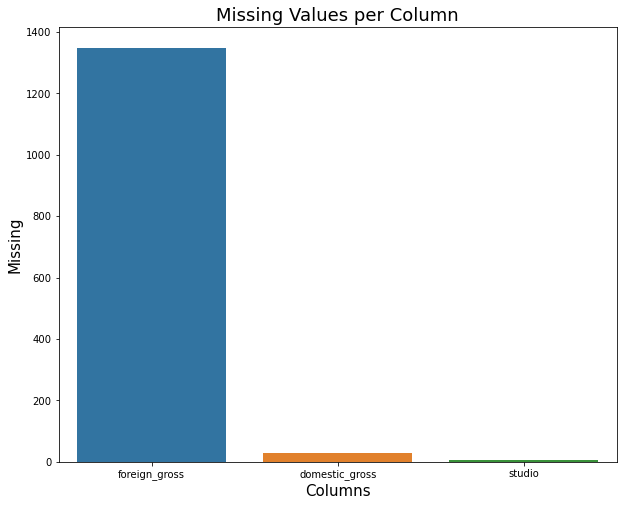

In [570]:
# Graphically represent the missing values
fig, axes = plt.subplots(figsize = (10, 8))
# plot a bargraph
sns.barplot(x = miss.index , y = miss["Missing"])
# Labeling axis
plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
plt.ylabel("Missing", fontdict={"color": "black", "size": 15})
plt.title("Missing Values per Column", fontsize = 18)
plt.show();


Foreign column has a total of 1346 missing values which translate to 39.84% of the data set. This value is high so we can’t drop it. The only appropriate way is to replace with the mean and drop the rows of missing values in domestic gross.

In [571]:
# Droping missing values of domestic_gross.

df.dropna(subset=['domestic_gross', 'studio'], inplace=True)

In [572]:

# converting foreign_gross to float
df['foreign_gross'] = df['foreign_gross'].apply(pd.to_numeric, errors='coerce')
# replaciing missing valuew of foreign_gross with it's mean
mean_foreign_gross = np.round(df['foreign_gross'].median(),0)
df['foreign_gross'].fillna(value=mean_foreign_gross, inplace = True)


In [573]:
#Confirniming the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3355 non-null   object 
 1   studio          3355 non-null   object 
 2   domestic_gross  3355 non-null   float64
 3   foreign_gross   3355 non-null   float64
 4   year            3355 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


### 3. Outliers
These are extreme data points that vary immensely from the other points and we are goig to use ```IQR``` to identifying and removing outliers.

Using Boxplot to check outliers

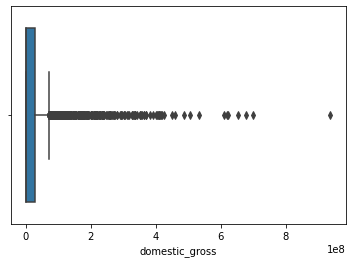

In [574]:
# checking outliers on domestic_gross
sns.boxplot(data=df, x="domestic_gross");

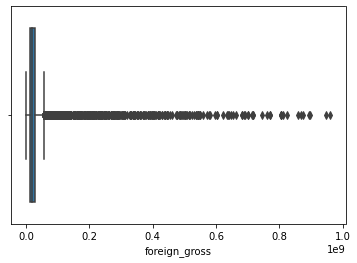

In [575]:
# checking outliers on foreign_gross
sns.boxplot(data=df, x="foreign_gross");

From the above boxplot there are a lot of outliers. In real movie industies  there are some films whoch are produced and won't make it in the market so it is wise not to drop them.

# Visualization
Plotting a pie chart to compare domestic and foreign gross


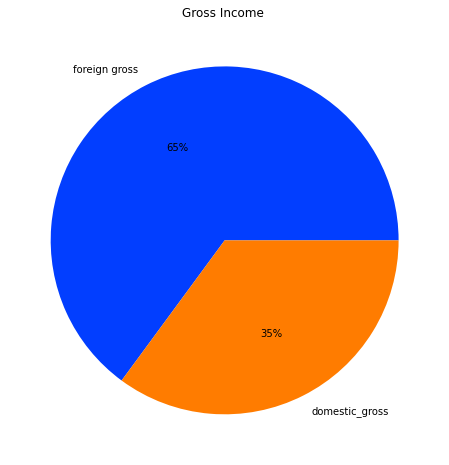

In [576]:
# tabulating data for pai chart
data = (df['foreign_gross'].sum(), df['domestic_gross'].sum())
keys = ('foreign gross', 'domestic_gross')

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
fig  = plt.subplots(figsize = (8,8))
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

# Title
plt.title('Gross Income ')

# displaying chart
plt.show();


From the above pie chart it is evidence that the foreign market is more profitable totalling to 65% of the total revenue.

Plot a scater chart domestic against foreign gross to see the relationship between the domestic and foreign market.

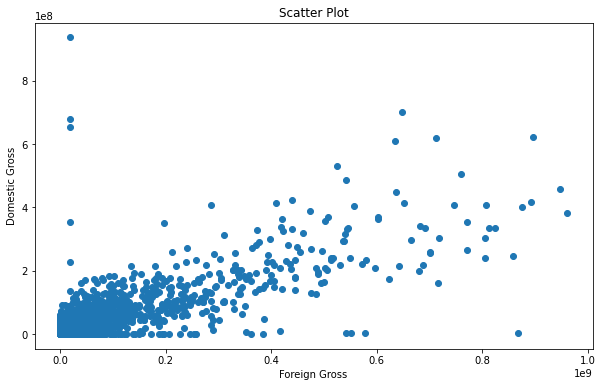

In [588]:
# Plotting scatter graph using matplotlib
tackle_figure, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['foreign_gross'], df["domestic_gross"])
ax.set_title('Scatter Plot')
ax.set_ylabel('Domestic Gross')
ax.set_xlabel('Foreign Gross');

There is a positive correlation between domestic market and foreign market. However the relationship is not that strong this might be due to diffrence prefrences in relation to loction.

Which are the top watched movies on both domestic and foreign market?


In [578]:
# Most watched movies on domestic market
# Creating new dom_df
dom_df = df[['title','studio', 'domestic_gross', 'year']].copy()
# Sort the Domestic column in descending order

dom_df = dom_df.sort_values('domestic_gross', ascending=False)
dom_df_top_10 = dom_df.head(10)

In [579]:
# Most watched movies on foreign market
# Creating new dom_df
forgn_df = df[['title', 'studio', 'foreign_gross', 'year']].copy()
# Sort the Domestic column in descending order

forgn_df= forgn_df.sort_values('foreign_gross', ascending=False)
forgn_df_top_10 = forgn_df.head(10)

In [580]:

top_10_forgn_movies = list(forgn_df_top_10['title'])
top_10_forgn_gross = forgn_df_top_10.foreign_gross


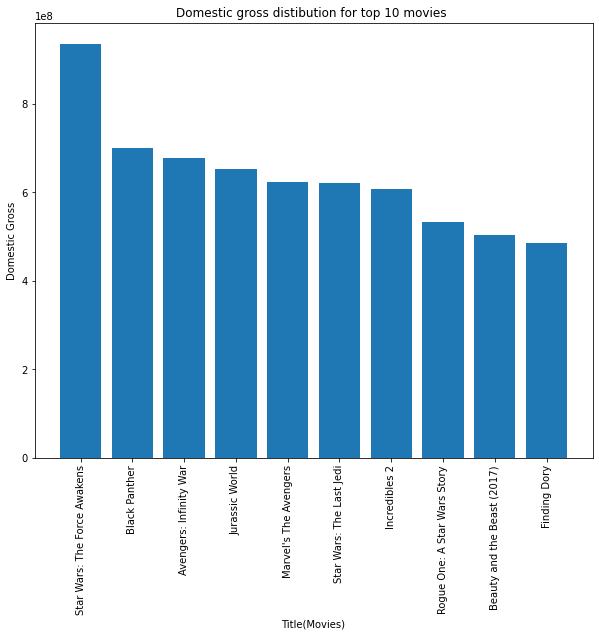

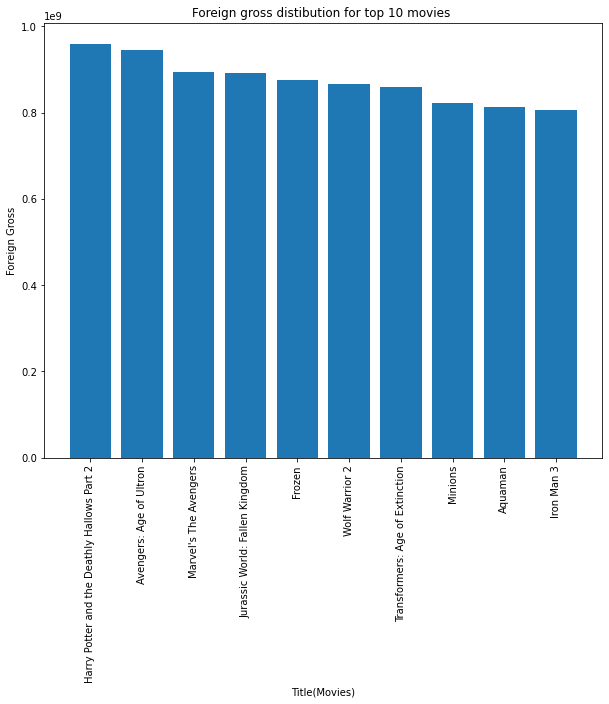

In [581]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x=top_10_dom_movies, height=top_10_dom_gross )
# xticks rotation
plt.xticks(rotation = '90')
# title
ax.set_title('Domestic gross distibution for top 10 movies ')
ax.set_ylabel('Domestic Gross')
ax.set_xlabel('Title(Movies)');

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x=top_10_forgn_movies, height=top_10_forgn_gross )
# xticks rotation
plt.xticks(rotation = '90')
# title
ax.set_title('Foreign gross distibution for top 10 movies ')
ax.set_ylabel('Foreign Gross')
ax.set_xlabel('Title(Movies)');

As much as the two gross has a positive correlation, the two gross has **only one** film that appeared on the top 10. This show that each geographica location has thier own prefrence and test when it com to movies. Further investigation should be done including while condidering other factors.

It is also important to understand the trend of the movie industry and how they have been performing over time. Aline graph will show us the performance 

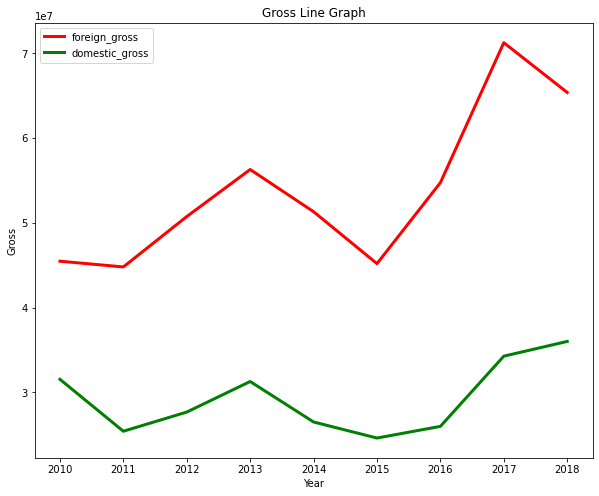

In [589]:
plt.subplots(figsize=(10,8))
sns.lineplot(x = 'year', y = 'foreign_gross', data=df, color='r', lw=3, ci=None)
sns.lineplot(x = 'year', y = 'domestic_gross', data=df, color='g', lw=3, ci=None)
plt.legend(labels=['foreign_gross','domestic_gross'], facecolor='white')
plt.title('Gross Line Graph')
plt.xlabel('Year')
plt.ylabel('Gross');

The film industry has over time been increasing in terms of profitability. However, there are a times when the gross drops and the trend is seen in both domestic and foreign gross. In the year 2011, both gross dropped and and there after increase significantly on 2012 before dropping again. 2013,2014 there was a significant drop which went below the previous drop before it climb on 2015 until 2017. 

In [583]:
# top foreign movies 100 movies 
forgn_df_top_100 =forgn_df.head(100)
forgn_studio = dict(forgn_df_top_100['studio'].value_counts().head(10))
top_forgn_studios = list(dict(dict(forgn_studio)).keys())
top_forgn_studios_frg = list(dict(dict(forgn_studio)).values())

print(top_forgn_studios)
print(top_forgn_studios_frg)


['BV', 'WB', 'Fox', 'Sony', 'Uni.', 'Par.', 'P/DW', 'WB (NL)', 'LGF', 'Sum.']
[31, 15, 12, 10, 9, 6, 5, 3, 2, 2]


In [584]:
# top 100 dommestic movies
dom_df_top_100 = dom_df.head(100)
dom_studio = dict(dom_df_top_100['studio'].value_counts().head(10))
top_dom_studios = (list(dict(dict(dom_studio)).keys()))
top_dom_studios_frq = list(dict(dict(dom_studio)).values())
print(top_dom_studios)
print(top_dom_studios_frq)

['BV', 'WB', 'Uni.', 'Fox', 'Par.', 'Sony', 'WB (NL)', 'LGF', 'P/DW', 'Sum.']
[35, 16, 15, 7, 6, 6, 4, 4, 4, 2]


Create a dataframe for top 100 most liked studios and plot a bar graph to compare the studios in relation to domestic and foriegn market.

In [585]:
# creating df for dommestic  favorite studios
dom_studio_df = pd.DataFrame({'studios': top_dom_studios,
                              'dom_studio_frq': top_dom_studios_frq ,
                                })

In [586]:
# creating df for foreign  favorite studios
forgn_studio_df = pd.DataFrame({'studios': top_forgn_studios,
                              'forgn_studio_frq': top_forgn_studios_frg,
                                })

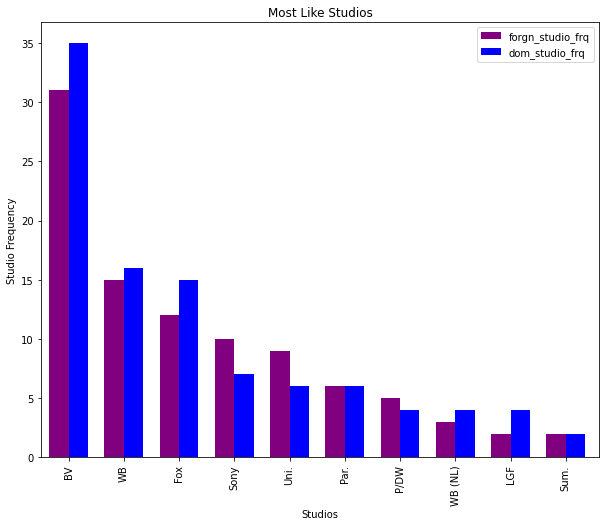

In [587]:
# ploting bar graph for most favorite studios
fig, ax = plt.subplots(figsize = (10,8))

index = np.arange(len(forgn_studio_df['studios']))
bar_width = 0.35
opacity = 0.8

forgn_studio_df.forgn_studio_frq.plot(kind='bar', color='purple', ax=ax, width=bar_width, position=1)
dom_studio_df.dom_studio_frq.plot(kind='bar', color='blue', ax=ax, width=bar_width, position=0)
ax.set_xlim(-0.5)
ax.set_xticks(index)
ax.set_xticklabels(forgn_studio_df['studios'])
ax.set_title('Most Like Studios')
ax.set_xlabel('Studios')
ax.set_ylabel('Studio Frequency')
plt.legend();

In the top 100 best performing films in both domestic and foreign gross. There are 10 most prefered film producers. In both markets, **`BV`** is the most prefered film producer which has 35 and 31 in domestic and foreign gross respectively. Then followed by **`WB`** less by 15 like from BV. It is thus advisable to have more films from BV and WB so as to make profits.